In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

In [2]:
app_train = pd.read_excel(r'C:\Users\Zhandos.Turar\Desktop\FPD60_Data_for_prediction.xlsx')
app_test = pd.read_excel(r'C:\Users\Zhandos.Turar\Desktop\FPD60_Data_for_prediction_test.xlsx')

In [3]:
pd.set_option('display.max_columns', None) 
app_train.head()

,AMT_CREDIT_TOTAL,CLIENT_DATE_BIRTH,NAME_INCOME_TYPE,AMT_INCOME_MAIN,MOBILE_PHONE,GCVP_0,AMT_PAYMENT_AVG,CNT_PAYMENTS,CODE_CLIENT_TYPE,GSPN_HIST,GSPN_NOW,FLAG_EXCLUDED_WC,FLAG_WC,FLAG_RPC,NAME_PRODUCT_TYPE,GOODS_CATEGORY,CNT_GOODS,TOTAL_GOODS_PRICE,FLAG_HAS_EXTRA_LIMIT,AMT_EXTRA_LIMIT,FLAG_USED_EXT_LIMIT,AMT_WITHDRAWAL_CASH,TARGET
0,138569,1968-07-30,коммерч. сотрудник,230000,7.078303e+09,1.0,0.00,0.0,NaN,50,51,0,1,1,Revolving loans,Tablets / Communicators,1.0,139990.0,0.0,0.0,0.0,NaN,1
1,199980,1985-03-24,коммерч. сотрудник,270000,7.074612e+09,NaN,NaN,NaN,Existing,500,52,0,1,1,Revolving loans,Audio and video equipment,2.0,199980.0,0.0,0.0,0.0,211800.0,1
2,384456,1950-10-03,пенсионер,160000,7.753682e+09,NaN,NaN,NaN,Existing,6,63,0,1,0,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,525423,1960-07-13,гос. служащий,200000,7.012881e+09,NaN,NaN,0.0,Existing,63,61,0,1,1,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,100123,1964-06-16,рабочий,90000,7.775792e+09,0.0,2498.32,3.0,Existing,102,60,0,1,0,Cash loans,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [4]:
app_train.info(max_cols=50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10079 entries, 0 to 10078
Data columns (total 23 columns):
AMT_CREDIT_TOTAL        10079 non-null int64
CLIENT_DATE_BIRTH       10079 non-null datetime64[ns]
NAME_INCOME_TYPE        10079 non-null object
AMT_INCOME_MAIN         10079 non-null int64
MOBILE_PHONE            9959 non-null float64
GCVP_0                  8088 non-null float64
AMT_PAYMENT_AVG         8088 non-null float64
CNT_PAYMENTS            8101 non-null float64
CODE_CLIENT_TYPE        10078 non-null object
GSPN_HIST               10079 non-null object
GSPN_NOW                10079 non-null int64
FLAG_EXCLUDED_WC        10079 non-null int64
FLAG_WC                 10079 non-null int64
FLAG_RPC                10079 non-null int64
NAME_PRODUCT_TYPE       10079 non-null object
GOODS_CATEGORY          7479 non-null object
CNT_GOODS               7479 non-null float64
TOTAL_GOODS_PRICE       7479 non-null float64
FLAG_HAS_EXTRA_LIMIT    212 non-null float64
AMT_EXTRA_LIMIT  

In [5]:
app_train.TARGET.value_counts()

0    8612
1    1467
Name: TARGET, dtype: int64

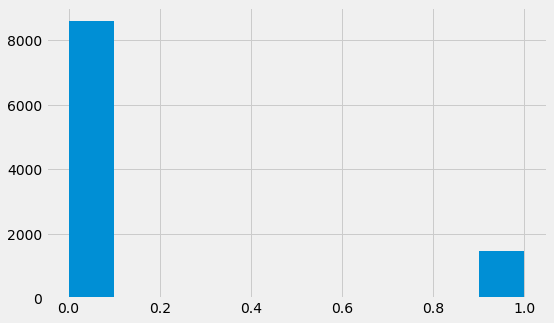

In [6]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [8,5]

plt.hist(app_train.TARGET)
plt.show()

In [7]:
def missing_values_table(df):
    
        # Всего недостает
        mis_val = df.isnull().sum()
        
        # Процент недостающих данных
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Таблица с результатами
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Переименование столбцов
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Сортировка про процентажу
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Инфо
        print ("В выбранном датафрейме " + str(df.shape[1]) + " столбцов.\n"      
            "Всего " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов с неполными данными.")
        
        # Возврат таблицы с данными
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(app_train)
missing_values.head(10)

В выбранном датафрейме 23 столбцов.
Всего 12 столбцов с неполными данными.


,Missing Values,% of Total Values
AMT_WITHDRAWAL_CASH,9967,98.9
FLAG_HAS_EXTRA_LIMIT,9867,97.9
AMT_EXTRA_LIMIT,9867,97.9
FLAG_USED_EXT_LIMIT,9867,97.9
GOODS_CATEGORY,2600,25.8
CNT_GOODS,2600,25.8
TOTAL_GOODS_PRICE,2600,25.8
GCVP_0,1991,19.8
AMT_PAYMENT_AVG,1991,19.8
CNT_PAYMENTS,1978,19.6


In [8]:
app_train.dtypes.value_counts()

float64           10
int64              7
object             5
datetime64[ns]     1
dtype: int64

In [9]:
app_train.select_dtypes(include=[object]).apply(pd.Series.nunique, axis = 0)

NAME_INCOME_TYPE      8
CODE_CLIENT_TYPE      2
GSPN_HIST            45
NAME_PRODUCT_TYPE     3
GOODS_CATEGORY       24
dtype: int64

In [10]:
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (10079, 100)
Testing Features shape:  (20876, 100)


In [11]:
#сохраним лейблы, их же нет в тестовой выборке и при выравнивании они потеряются. 
train_labels = app_train['TARGET']
# Выравнивание - сохранятся только столбцы. имеющиеся в обоих датафреймах
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
print('Формат тренировочной выборки: ', app_train.shape)
print('Формат тестовой выборки: ', app_test.shape)
# Add target back in to the data
app_train['TARGET'] = train_labels

Формат тренировочной выборки:  (10079, 98)
Формат тестовой выборки:  (20876, 98)


In [12]:
correlations = app_train.corr()['TARGET'].sort_values()
print('Наивысшая позитивная корреляция: \n', correlations.tail(15))
print('\nНаивысшая негативная корреляция: \n', correlations.head(15))

Наивысшая позитивная корреляция: 
 GSPN_HIST_34                              0.031825
TOTAL_GOODS_PRICE                         0.034505
GCVP_0                                    0.039132
FLAG_USED_EXT_LIMIT                       0.057093
NAME_INCOME_TYPE_рабочий                  0.060049
FLAG_RPC                                  0.062144
NAME_INCOME_TYPE_коммерч. сотрудник       0.067951
GOODS_CATEGORY_Tablets / Communicators    0.072331
FLAG_WC                                   0.085102
AMT_EXTRA_LIMIT                           0.089092
FLAG_HAS_EXTRA_LIMIT                      0.115635
CODE_CLIENT_TYPE_New                      0.154183
GOODS_CATEGORY_Others                     0.173462
NAME_PRODUCT_TYPE_Revolving loans         0.313978
TARGET                                    1.000000
Name: TARGET, dtype: float64

Наивысшая негативная корреляция: 
 AMT_WITHDRAWAL_CASH                       -0.178673
CODE_CLIENT_TYPE_Existing                 -0.154689
AMT_PAYMENT_AVG                

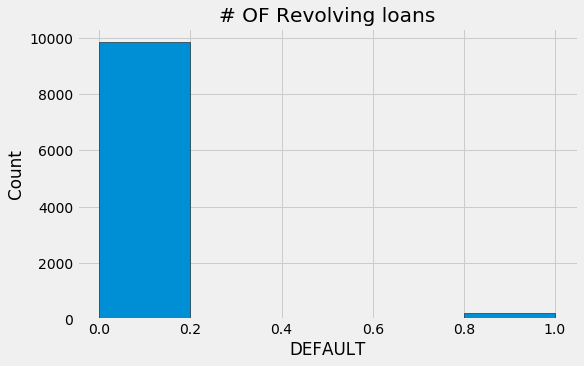

In [13]:
plt.hist(app_train['NAME_PRODUCT_TYPE_Revolving loans'], edgecolor = 'k', bins = 5)
plt.title('# OF Revolving loans'); plt.xlabel('DEFAULT'); plt.ylabel('Count');

In [14]:
ext_data = app_train[['TARGET', 'AMT_WITHDRAWAL_CASH', 'NAME_PRODUCT_TYPE_Revolving loans', 'AMT_PAYMENT_AVG', 'NAME_INCOME_TYPE_пенсионер']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,AMT_WITHDRAWAL_CASH,NAME_PRODUCT_TYPE_Revolving loans,AMT_PAYMENT_AVG,NAME_INCOME_TYPE_пенсионер
TARGET,1.000000,-0.178673,0.313978,-0.143847,-0.118534
AMT_WITHDRAWAL_CASH,-0.178673,1.000000,NaN,0.100888,0.043823
NAME_PRODUCT_TYPE_Revolving loans,0.313978,NaN,1.000000,-0.067660,-0.070574
AMT_PAYMENT_AVG,-0.143847,0.100888,-0.067660,1.000000,0.618530
NAME_INCOME_TYPE_пенсионер,-0.118534,0.043823,-0.070574,0.618530,1.000000


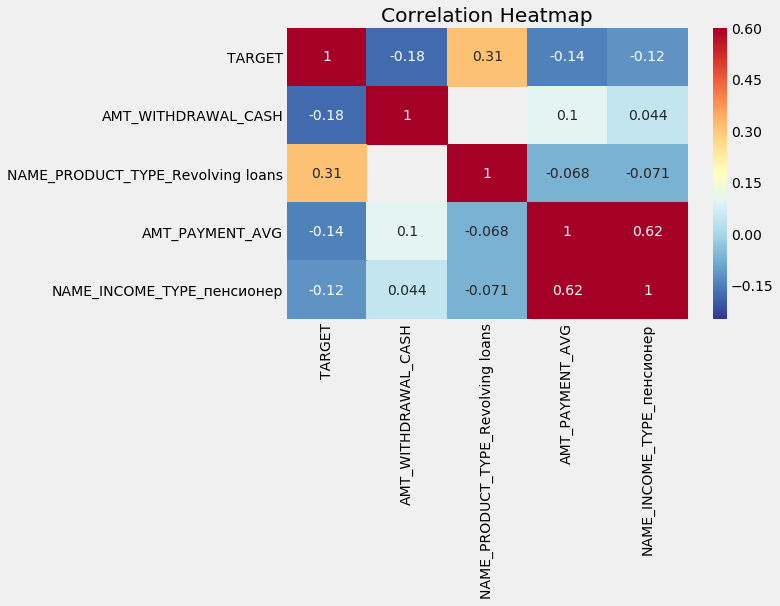

In [15]:
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


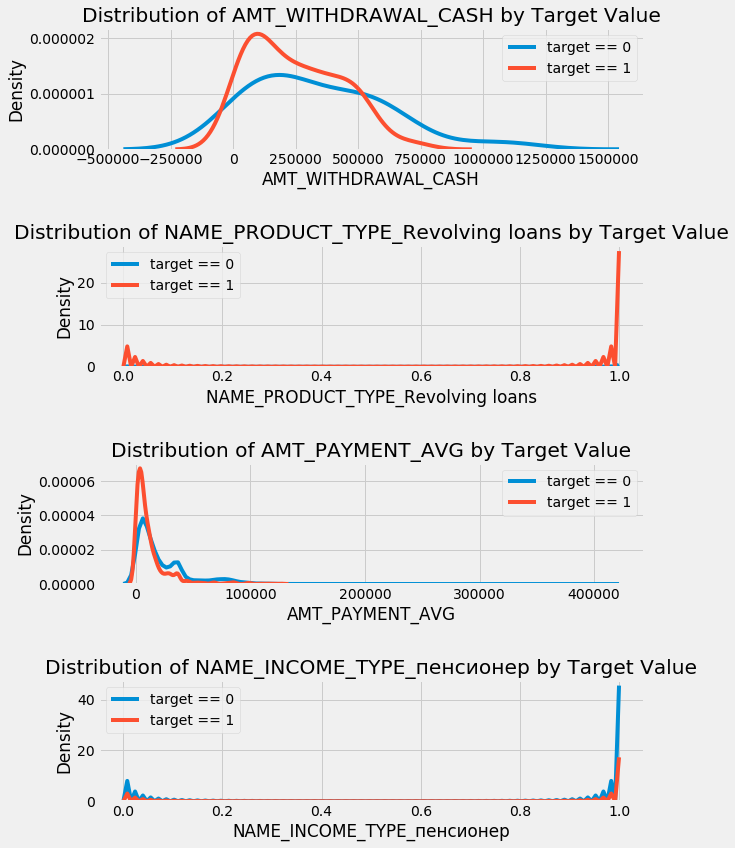

In [16]:
plt.figure(figsize = (10, 12))

# итерация по источникам
for i, source in enumerate(['AMT_WITHDRAWAL_CASH', 'NAME_PRODUCT_TYPE_Revolving loans', 'AMT_PAYMENT_AVG', 'NAME_INCOME_TYPE_пенсионер']):
    
    # сабплот
    plt.subplot(4, 1, i + 1)
    # отрисовка качественных займов
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, source], label = 'target == 0')
    # отрисовка дефолтных займов
    sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, source], label = 'target == 1')
    
    # метки
    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\

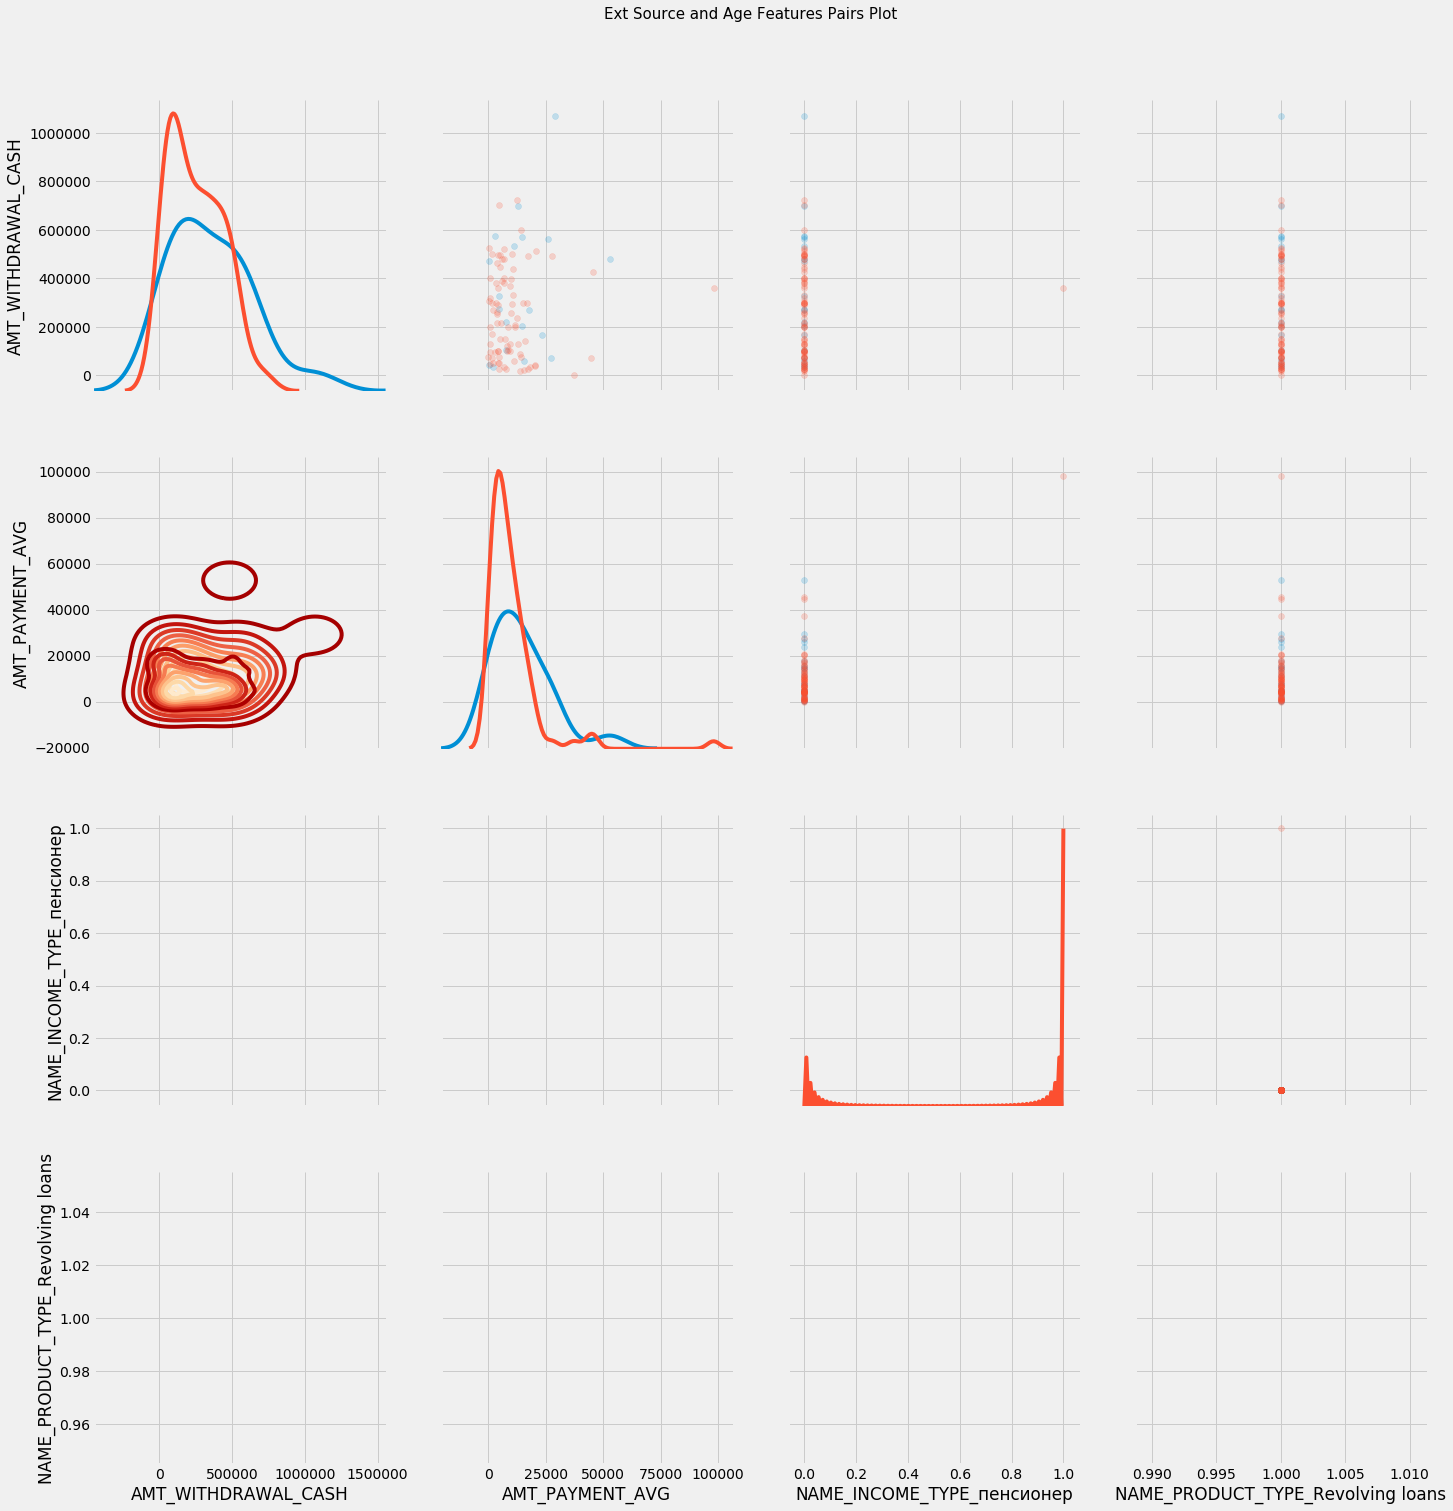

In [17]:
#вынесем данные по revolving loans в отдельный датафрейм
loan_data = app_train[['TARGET', 'NAME_PRODUCT_TYPE_Revolving loans']]
loan_data['NAME_PRODUCT_TYPE_Revolving loans'] = app_train['NAME_PRODUCT_TYPE_Revolving loans']

# копирование данных для графика
plot_data = ext_data.drop(labels = ['NAME_PRODUCT_TYPE_Revolving loans'], axis=1).copy()

# Добавим revolving
plot_data['NAME_PRODUCT_TYPE_Revolving loans'] = loan_data['NAME_PRODUCT_TYPE_Revolving loans']

# Уберем все незаполненнные строки и ограничим таблицу в 100 тыс. строк
plot_data = plot_data.dropna().loc[:100000, :]

# Функиця для расчет корреляции
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Создание объекта pairgrid object
grid = sns.PairGrid(data = plot_data, size = 5, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Сверху - скаттерплот
grid.map_upper(plt.scatter, alpha = 0.2)

# Диагональ - гистограмма
grid.map_diag(sns.kdeplot)

# Внизу - распределение плотности
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 15, y = 1.05);

In [18]:
application_train = pd.read_excel(r'C:\Users\Zhandos.Turar\Desktop\FPD60_Data_for_prediction.xlsx')
application_test = pd.read_excel(r'C:\Users\Zhandos.Turar\Desktop\FPD60_Data_for_prediction_test.xlsx')

In [19]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Количество займов': temp.values})

    # Расчет доли target=1 в категории
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Количество займов",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Доля проблемных', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

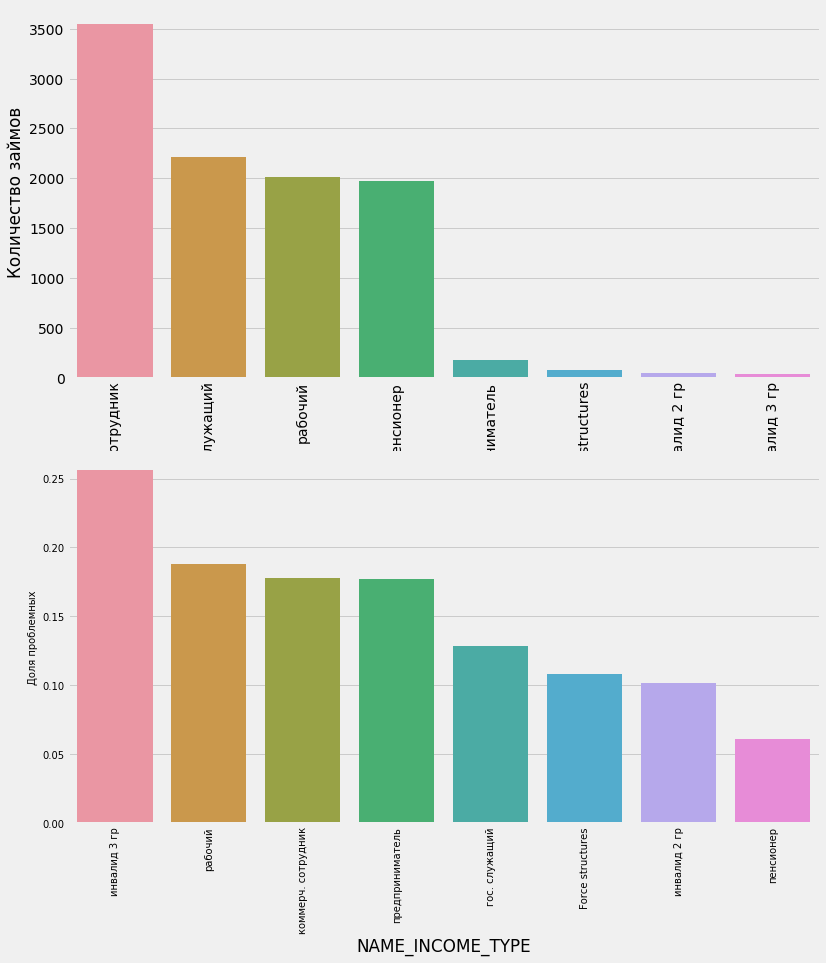

In [20]:
plot_stats('NAME_INCOME_TYPE', True, False)

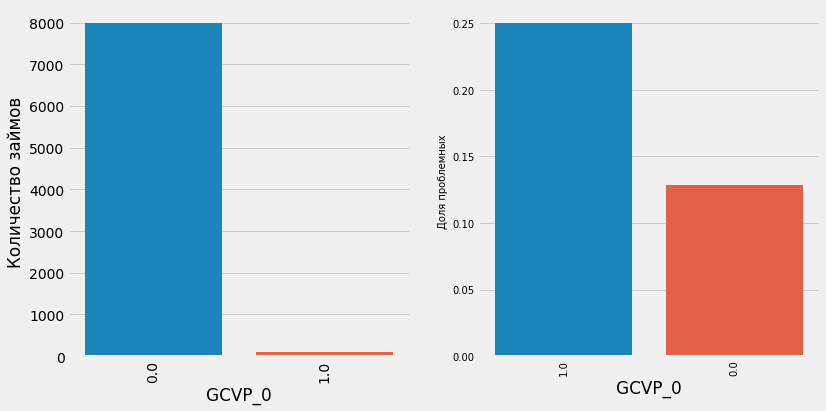

In [21]:
plot_stats('GCVP_0', True)

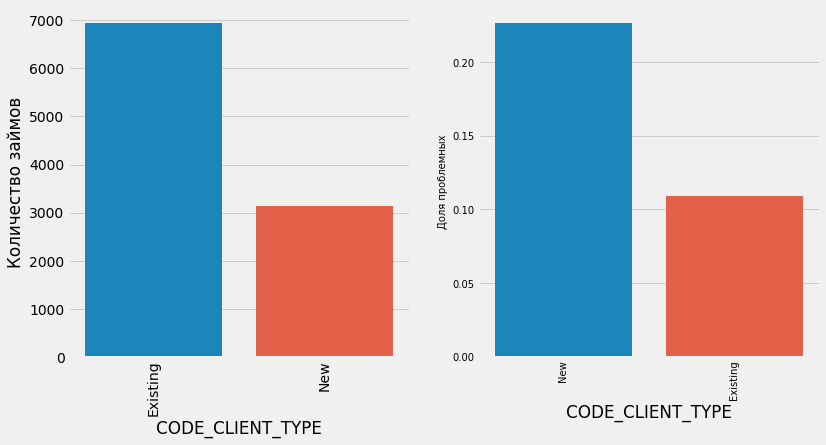

In [22]:
plot_stats('CODE_CLIENT_TYPE', True)

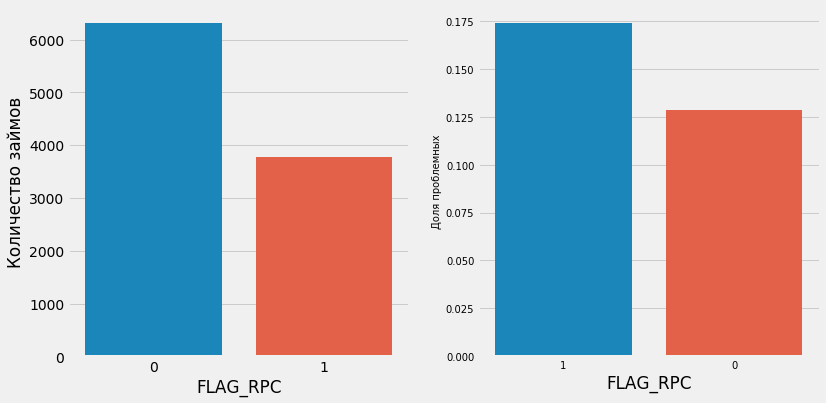

In [23]:
plot_stats('FLAG_RPC')

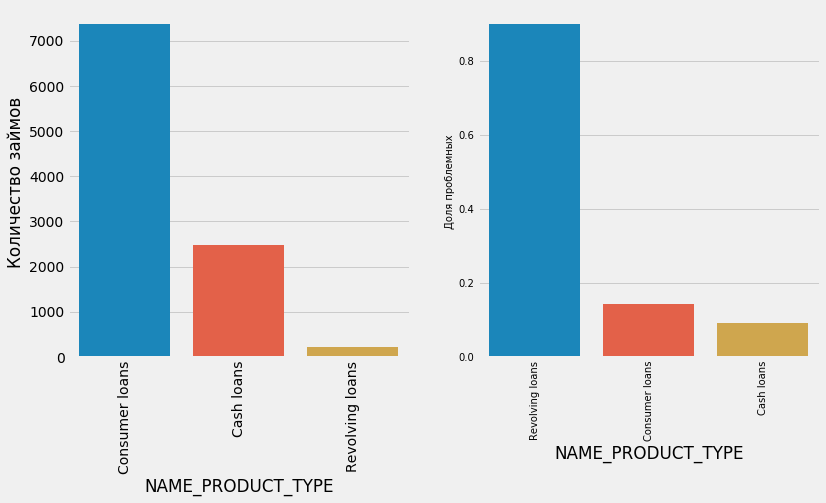

In [24]:
plot_stats('NAME_PRODUCT_TYPE', True, True)

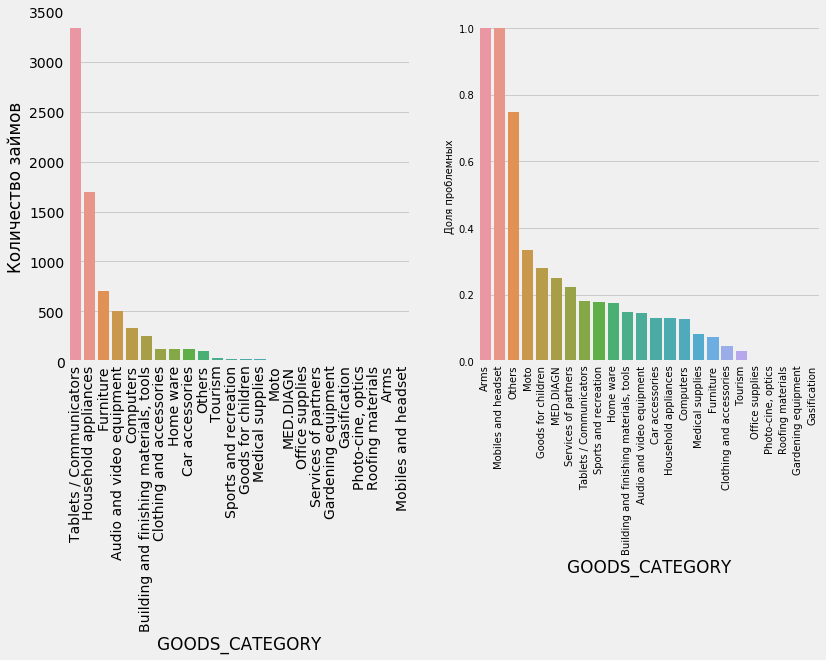

In [25]:
plot_stats('GOODS_CATEGORY', True, True)

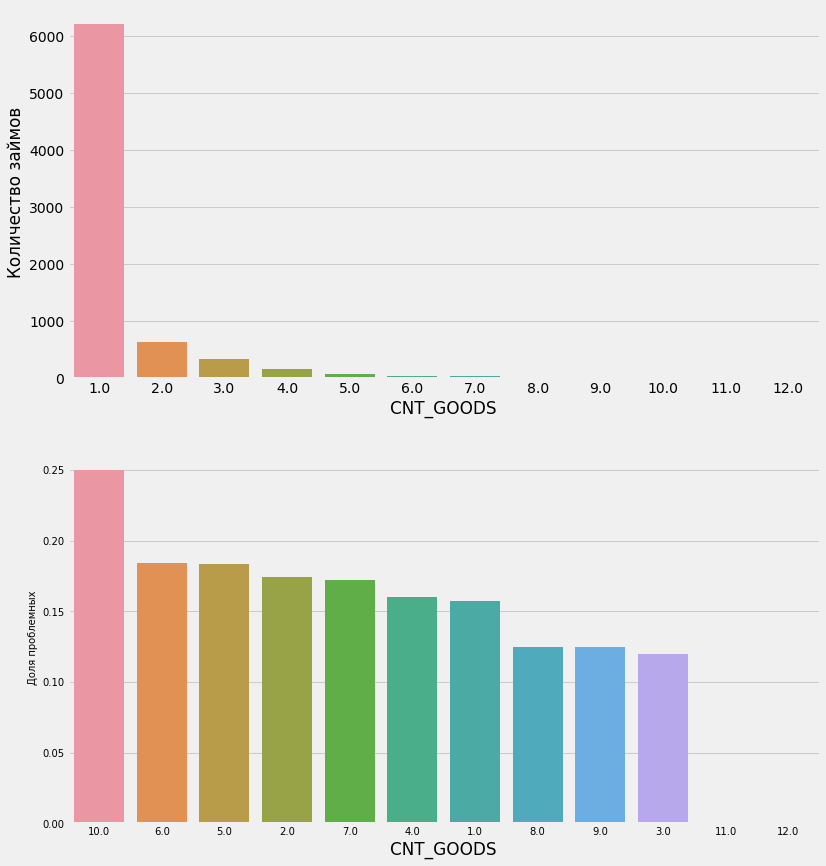

In [26]:
plot_stats('CNT_GOODS', False, False)

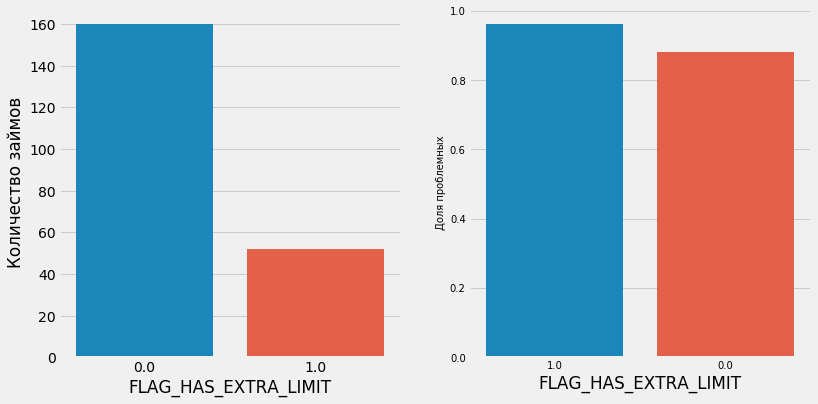

In [27]:
plot_stats('FLAG_HAS_EXTRA_LIMIT')

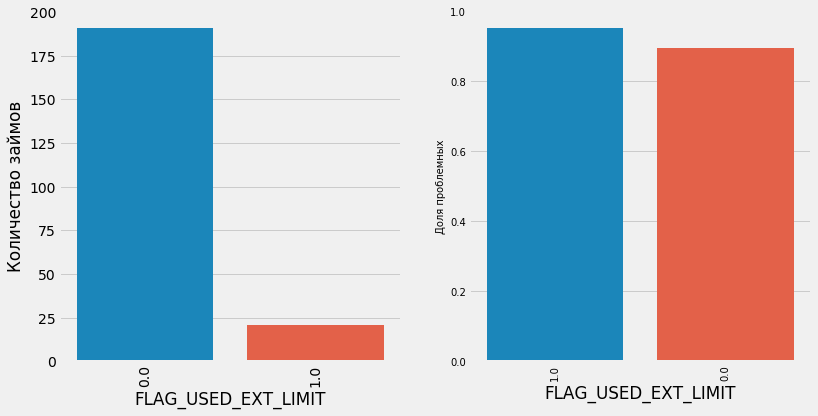

In [28]:
plot_stats('FLAG_USED_EXT_LIMIT', True, True)

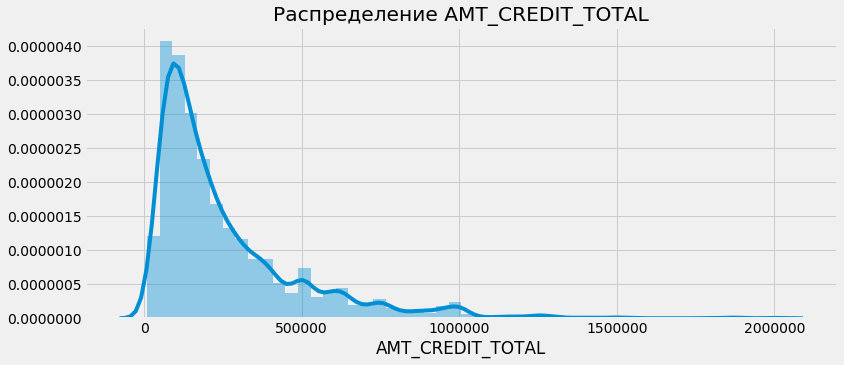

In [29]:
plt.figure(figsize=(12,5))
plt.title("Распределение AMT_CREDIT_TOTAL")
ax = sns.distplot(app_train["AMT_CREDIT_TOTAL"])

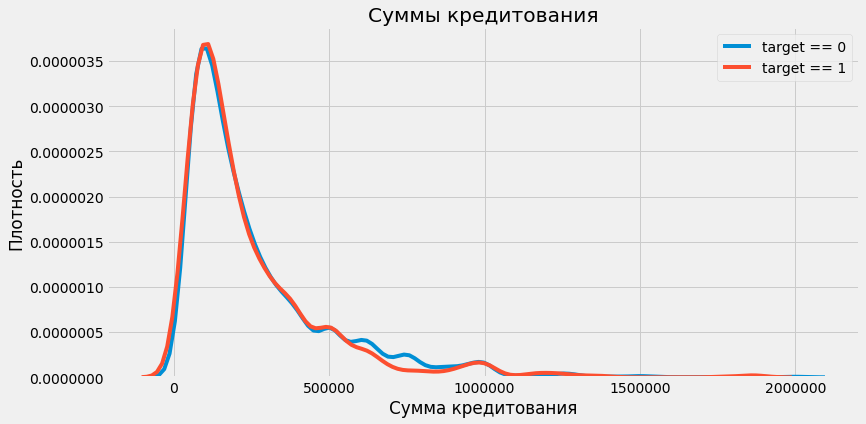

In [30]:
plt.figure(figsize=(12,6))

#займы, выплаченных вовремя
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'AMT_CREDIT_TOTAL'], label = 'target == 0')

# проблемные займы
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'AMT_CREDIT_TOTAL'], label = 'target == 1')

# Обозначения
plt.xlabel('Сумма кредитования'); plt.ylabel('Плотность'); plt.title('Суммы кредитования');

In [31]:
poly_features = app_train[['NAME_PRODUCT_TYPE_Revolving loans', 'AMT_WITHDRAWAL_CASH', 'AMT_PAYMENT_AVG', 'TARGET']]
poly_features_test = app_test[['NAME_PRODUCT_TYPE_Revolving loans', 'AMT_WITHDRAWAL_CASH', 'AMT_PAYMENT_AVG']]

# обработаем отуствующие данные
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop('TARGET', axis=1)

poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Создадим полиномиальный объект степени 3
poly_transformer = PolynomialFeatures(degree = 3)

# Тренировка полиномиальных признаков
poly_transformer.fit(poly_features)

# Трансформация признаков
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Формат полиномиальных признаков: ', poly_features.shape)

Формат полиномиальных признаков:  (10079, 20)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [32]:
poly_transformer.get_feature_names(input_features = ['NAME_PRODUCT_TYPE_Revolving loans', 'AMT_WITHDRAWAL_CASH', 'AMT_PAYMENT_AVG'])[:15]

['1',
 'NAME_PRODUCT_TYPE_Revolving loans',
 'AMT_WITHDRAWAL_CASH',
 'AMT_PAYMENT_AVG',
 'NAME_PRODUCT_TYPE_Revolving loans^2',
 'NAME_PRODUCT_TYPE_Revolving loans AMT_WITHDRAWAL_CASH',
 'NAME_PRODUCT_TYPE_Revolving loans AMT_PAYMENT_AVG',
 'AMT_WITHDRAWAL_CASH^2',
 'AMT_WITHDRAWAL_CASH AMT_PAYMENT_AVG',
 'AMT_PAYMENT_AVG^2',
 'NAME_PRODUCT_TYPE_Revolving loans^3',
 'NAME_PRODUCT_TYPE_Revolving loans^2 AMT_WITHDRAWAL_CASH',
 'NAME_PRODUCT_TYPE_Revolving loans^2 AMT_PAYMENT_AVG',
 'NAME_PRODUCT_TYPE_Revolving loans AMT_WITHDRAWAL_CASH^2',
 'NAME_PRODUCT_TYPE_Revolving loans AMT_WITHDRAWAL_CASH AMT_PAYMENT_AVG']

In [33]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['NAME_PRODUCT_TYPE_Revolving loans', 'AMT_WITHDRAWAL_CASH', 
                                                                           'AMT_PAYMENT_AVG']))

# Добавим таргет
poly_features['TARGET'] = poly_target

# рассчитаем корреляцию
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Отобразим признаки с наивысшей корреляцией
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

AMT_PAYMENT_AVG                                       -0.135793
AMT_WITHDRAWAL_CASH AMT_PAYMENT_AVG                   -0.134000
AMT_WITHDRAWAL_CASH^2 AMT_PAYMENT_AVG                 -0.119053
AMT_PAYMENT_AVG^2                                     -0.074349
AMT_WITHDRAWAL_CASH AMT_PAYMENT_AVG^2                 -0.073821
AMT_PAYMENT_AVG^3                                     -0.026626
AMT_WITHDRAWAL_CASH                                    0.026765
AMT_WITHDRAWAL_CASH^3                                  0.041578
AMT_WITHDRAWAL_CASH^2                                  0.052687
NAME_PRODUCT_TYPE_Revolving loans AMT_PAYMENT_AVG^2    0.076287
Name: TARGET, dtype: float64
NAME_PRODUCT_TYPE_Revolving loans      0.313978
NAME_PRODUCT_TYPE_Revolving loans^3    0.313978
NAME_PRODUCT_TYPE_Revolving loans^2    0.313978
TARGET                                 1.000000
1                                           NaN
Name: TARGET, dtype: float64


In [34]:
# загрузим тестовые признаки в датафрейм
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['NAME_PRODUCT_TYPE_Revolving loans', 'AMT_WITHDRAWAL_CASH', 
                                                                                'AMT_PAYMENT_AVG']))

# объединим тренировочные датафреймы
poly_features['MOBILE_PHONE'] = app_train['MOBILE_PHONE']
app_train_poly = app_train.merge(poly_features, on = 'MOBILE_PHONE', how = 'left')

# объединим тестовые датафреймы
poly_features_test['MOBILE_PHONE'] = app_test['MOBILE_PHONE']
app_test_poly = app_test.merge(poly_features_test, on = 'MOBILE_PHONE', how = 'left')

# Выровняем датафреймы
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)

# Посмотрим формат
print('Тренировочная выборка с полиномиальными признаками: ', app_train_poly.shape)
print('Тестовая выборка с полиномиальными признаками: ', app_test_poly.shape)

Тренировочная выборка с полиномиальными признаками:  (24421, 118)
Тестовая выборка с полиномиальными признаками:  (85282, 118)


In [35]:
app_train['NAME_PRODUCT_TYPE_Revolving loans'] = pd.to_numeric(app_train['NAME_PRODUCT_TYPE_Revolving loans'], errors='coerce')

In [36]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [37]:
# Уберем таргет из тренировочных данных
if 'TARGET' in app_train:
    train = app_train.drop(labels = ['TARGET'], axis=1)
else:
    train = app_train.copy()
features = list(train.columns)

# копируем тестовые данные
test = app_test.copy()

# заполним недостающее по медиане
imputer = Imputer(strategy = 'median')

# Нормализация
scaler = MinMaxScaler(feature_range = (0, 1))

# заполнение тренировочной выборки
imputer.fit(train)

# Трансофрмация тренировочной и тестовой выборок
train = imputer.transform(train)
test = imputer.transform(app_test)

# то же самое с нормализацией
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Формат тренировочной выборки: ', train.shape)
print('Формат тестовой выборки: ', test.shape)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


TypeError: float() argument must be a string or a number, not 'Timestamp'